In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier(iterations=100)
#cb.fit(X, y, cat_features = cat_features, verbose = False)

In [4]:
data = pd.read_csv('../../Data/Combo_3_DropNAs.csv')
data.shape

(11091453, 4)

In [5]:
data.head(5)

,Risk_Score,DI,Employment Length,Accepted
0,0.411783,-0.008441,2.668416,1
1,0.871415,-0.007807,2.668416,1
2,0.641599,-0.008137,2.668416,1
3,1.675772,-0.007744,2.668416,1
4,0.641599,-0.007225,0.458258,1


In [6]:
data.Accepted.value_counts()*0.3

0    2693342.7
1     634093.2
Name: Accepted, dtype: float64

In [7]:
X = data.drop('Accepted', axis=1)
X.shape

(11091453, 3)

In [8]:
y = data['Accepted']

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [10]:
cb.fit(X_train, y_train, verbose=10)

Learning rate set to 0.5
0:	learn: 0.3839813	total: 323ms	remaining: 32s
10:	learn: 0.1156800	total: 2.21s	remaining: 17.9s
20:	learn: 0.0873490	total: 3.98s	remaining: 15s
30:	learn: 0.0788544	total: 5.77s	remaining: 12.9s
40:	learn: 0.0735253	total: 7.54s	remaining: 10.9s
50:	learn: 0.0707066	total: 9.32s	remaining: 8.96s
60:	learn: 0.0692506	total: 11.1s	remaining: 7.07s
70:	learn: 0.0681769	total: 12.8s	remaining: 5.22s
80:	learn: 0.0675094	total: 14.5s	remaining: 3.4s
90:	learn: 0.0669759	total: 16.2s	remaining: 1.6s
99:	learn: 0.0667983	total: 17.8s	remaining: 0us


In [11]:
cb.score(X_test, y_test)

0.9736052023239515

In [12]:
from sklearn.metrics import confusion_matrix
y_pred = cb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2655357,   37986],
       [  49841,  584252]])

In [14]:
confusion_matrix_full = pd.DataFrame(cm,
                                     index=["Actual_Rejected","Actual_Accepted"],
                                     columns=["Predicted_Rejected","Predicted_Accepted"])

confusion_matrix_full

,Predicted_Rejected,Predicted_Accepted
Actual_Rejected,2655357,37986
Actual_Accepted,49841,584252


In [15]:
#Recall Score Matches the same 92.1% obtained on Stratified K-fold in separate notebook: 

from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.9213979652826951

In [16]:
584252 / (49841 + 584252)

0.9213979652826951

In [17]:
X.columns

Index(['Risk_Score', 'DI', 'Employment Length'], dtype='object')

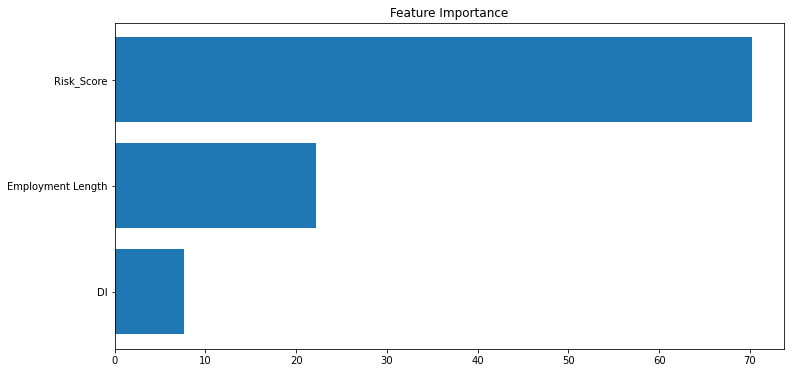

In [18]:
import matplotlib.pyplot as plt

feature_importance = cb.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('Feature Importance');

In [19]:
import shap

Text(0.5, 1.0, 'SHAP Importance')

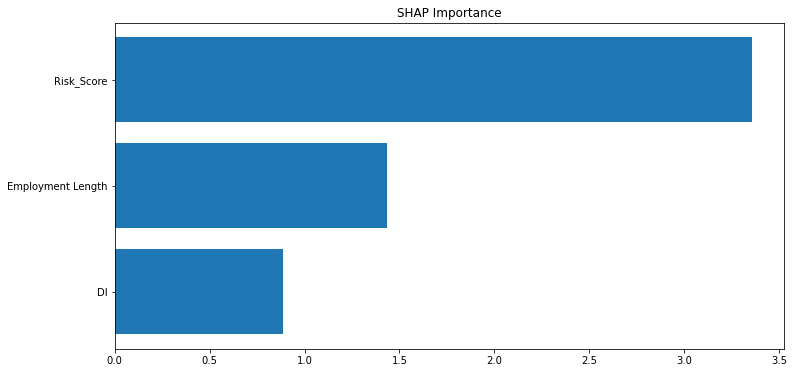

In [20]:
explainer = shap.Explainer(cb)
shap_values = explainer(X_test)
shap_importance = shap_values.abs.mean(0).values
sorted_idx = shap_importance.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), shap_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])
plt.title('SHAP Importance')

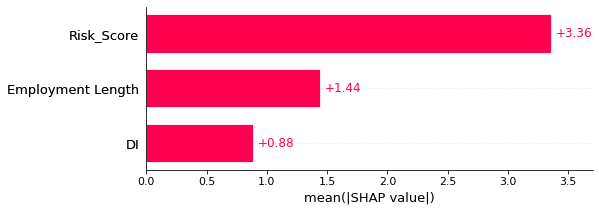

In [21]:
shap.plots.bar(shap_values, max_display=X_test.shape[0])

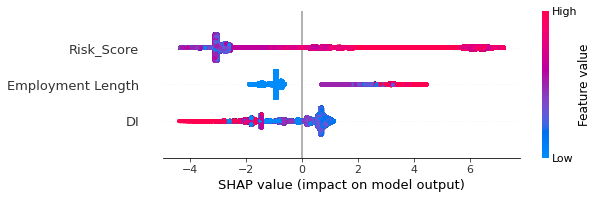

In [22]:
shap.summary_plot(shap_values, max_display=X_test.shape[0])